In [0]:
from keras.datasets import cifar10 #importing dataset from keras.

In [0]:
from keras.utils import np_utils 
from keras.models import Sequential # sequential-->linear stack of layers
from keras.layers.core import Dense, Dropout, Activation, Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#from keras.layers import  Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [0]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3 # 3 since rgb
IMAGE_SIZE = 32 # width=height= 32

In [0]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2 #train the model with 80 and test the model with 20 ie splits into training and testing model
OPTIM = RMSprop()

In [70]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #(X_train and X_test)-->contains the image and (y_train and y_test)-->contains the labels(0-9)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


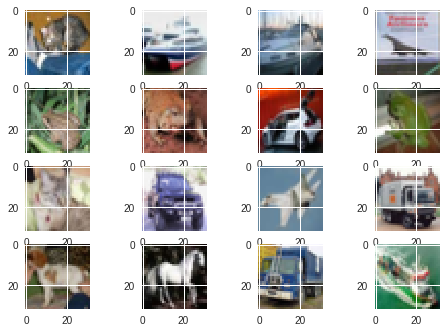

In [71]:
#visualizing images of test set
from matplotlib import pyplot
from scipy.misc import toimage
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test[:16])

In [0]:
# convert to categorical: converts into vector class(0-9)
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
# float and normalization  (converting pixel values by default which is between 0 to 255 to 0 to 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [74]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
input_shape=(IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [76]:
# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
verbose=VERBOSE)

#test
score = model.evaluate(X_test, Y_test,
batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', (score[1]*100))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 13s 329us/step - loss: 1.7970 - acc: 0.3490 - val_loss: 1.6023 - val_acc: 0.4384
Epoch 2/20
40000/40000 [==============================] - 11s 280us/step - loss: 1.3462 - acc: 0.5200 - val_loss: 1.3105 - val_acc: 0.5449
Epoch 3/20
40000/40000 [==============================] - 11s 279us/step - loss: 1.1335 - acc: 0.6010 - val_loss: 1.0667 - val_acc: 0.6209
Epoch 4/20
40000/40000 [==============================] - 11s 281us/step - loss: 0.9991 - acc: 0.6468 - val_loss: 0.8975 - val_acc: 0.6871
Epoch 5/20
40000/40000 [==============================] - 11s 279us/step - loss: 0.9003 - acc: 0.6850 - val_loss: 0.8524 - val_acc: 0.7013
Epoch 6/20
40000/40000 [==============================] - 11s 281us/step - loss: 0.8272 - acc: 0.7107 - val_loss: 0.7778 - val_acc: 0.7297
Epoch 7/20
40000/40000 [==============================] - 11s 278us/step - loss: 0.7679 - acc: 0.7323 - val_loss: 0.

In [77]:
#test
score = model.evaluate (X_test, Y_test, verbose=0)
print ("Accuracy: %.2f%%"%(score[1]*100))

Accuracy: 76.49%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


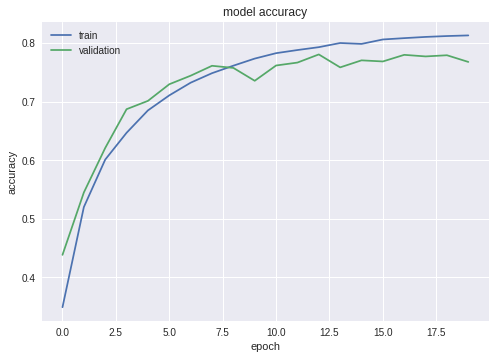

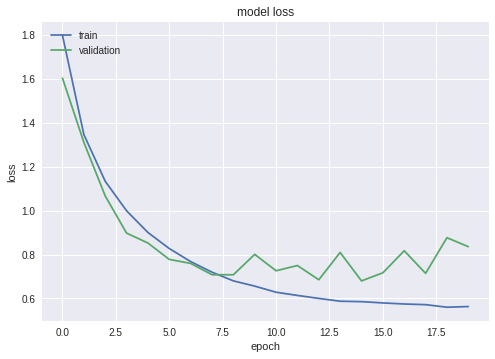

In [79]:
#building a graph
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('fig1.png')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('fig2.png')
plt.show()

In [80]:
#Predicting using image downloaded from net
from google.colab import files
!rm -r *
!mkdir data
!ls

data


In [0]:
import scipy.misc

In [0]:
import numpy as np

In [83]:
# uploading images from desktop
files.upload()
!ls

Saving arplane.jpg to arplane.jpg
Saving atmb.jpg to atmb.jpg
Saving bird.jpg to bird.jpg
Saving cat.jpg to cat.jpg
Saving deer.jpg to deer.jpg
Saving dog.jpg to dog.jpg
Saving dog2.jpg to dog2.jpg
Saving frog.jpg to frog.jpg
Saving horse.jpg to horse.jpg
Saving ship.jpg to ship.jpg
Saving truck.jpg to truck.jpg
arplane.jpg  bird.jpg  data	 dog2.jpg  frog.jpg   ship.jpg
atmb.jpg     cat.jpg   deer.jpg  dog.jpg   horse.jpg  truck.jpg


In [84]:
#for dog
imgs = scipy.misc.imread('dog2.jpg') #reding the image
imgs = scipy.misc.imresize(imgs, (32,32)) #resizing the image
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([5])

In [86]:
imgs = scipy.misc.imread('deer.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([7])

In [87]:
imgs = scipy.misc.imread('arplane.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([0])

In [88]:
imgs = scipy.misc.imread('ship.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([8])

In [89]:
imgs = scipy.misc.imread('truck.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([9])

In [90]:
imgs = scipy.misc.imread('atmb.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([1])

In [93]:
imgs = scipy.misc.imread('horse.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([7])